### Data Preprocessing

cleaning and organizing raw data for making it suitable for modelling

Why do we need to preprocess data?
Data in the real world:
* Missing data
* Inconsistent
* Noisy

Quality of the decisions be based on the quality of the data. 

### Steps in Data Preprocessing

* **Data Cleaning**
* **Data Integration**
* **Data Transformation**
* **Dimensionality Reduction**



### 1. Data Cleaning

- process of identifying and correcting missing or inconsistent data to ensure accuracy and completeness.



In [5]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

data = pd.DataFrame({
    "name": ['John', 'Jane', 'John', None, 'Mike'],
    "age": [28, 34, None, 28, 22],
    'purchase_amount': [100.5, None, 85.3, 100.5, 50.0],
    'date_of_purchase': ['2023/23/01', '2023/12/02', '2023/12/01', '2023/12/01', '2023/12/03'],
})


imputer = SimpleImputer(strategy='mean')
data[['age', 'purchase_amount']] = imputer.fit_transform(data[['age', 'purchase_amount']])

data = data.drop_duplicates()

data['date_of_purchase'] = pd.to_datetime(data['date_of_purchase'],errors = 'coerce')

print(data)

   name   age  purchase_amount date_of_purchase
0  John  28.0          100.500              NaT
1  Jane  34.0           84.075       2023-12-02
2  John  28.0           85.300       2023-12-01
3  None  28.0          100.500       2023-12-01
4  Mike  22.0           50.000       2023-12-03


/var/folders/m9/j9s4np6n4093jb6mgddz4btw0000gn/T/ipykernel_50759/233523492.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date_of_purchase'] = pd.to_datetime(data['date_of_purchase'],errors = 'coerce')


### 2. Data Integration

In [7]:
#Creating two manual datasets
data1 = pd.DataFrame({
    'customer_id': [1, 2, 3],
    'name': ['John', 'Jane', 'Jack'],
    'age': [28, 34, 29]
})

data2 = pd.DataFrame({
    'customer_id': [1, 2, 4],
    'purchase_amount': [100.5, 85.3, 45.0],
    'purchase_date': ['2023-12-01', '2023-12-02', '2023-12-03']
})

merged_data = pd.merge(data1, data2, on='customer_id', how='inner')

print(merged_data)

   customer_id  name  age  purchase_amount purchase_date
0            1  John   28            100.5    2023-12-01
1            2  Jane   34             85.3    2023-12-02


### 3. Data Tranformation

convert data into the required format

In [8]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Creating a manual dataset
data = pd.DataFrame({
    'category': ['A', 'B', 'A', 'C', 'B'],
    'numeric_column': [10, 15, 10, 20, 15]
})

# Scaling numeric data
scaler = StandardScaler()
data['scaled_numeric_column'] = scaler.fit_transform(data[['numeric_column']])

# Encoding categorical variables using one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
encoded_data = pd.DataFrame(encoder.fit_transform(data[['category']]), columns=encoder.get_feature_names_out(['category']))

# concatenating the encodeed data with the original dataset
data = pd.concat([data, encoded_data], axis=1)

print(data)

  category  numeric_column  scaled_numeric_column  category_A  category_B  \
0        A              10              -1.069045         1.0         0.0   
1        B              15               0.267261         0.0         1.0   
2        A              10              -1.069045         1.0         0.0   
3        C              20               1.603567         0.0         0.0   
4        B              15               0.267261         0.0         1.0   

   category_C  
0         0.0  
1         0.0  
2         0.0  
3         1.0  
4         0.0  


### 4. Data Reduction

reducing features or records while preserving the accuracy of the model.

In [9]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2

data = pd.DataFrame({
    'feature1': [10, 20, 30, 40, 50],
    'feature2': [1, 2, 3, 4, 5],
    'feature3': [100, 200, 300, 400, 500],
    'target': [0, 1, 0, 1, 0]
})

# Feature Selection using SelectKBest
selector= SelectKBest(chi2, k=2)
selected_features = selector.fit_transform(data[['feature1', 'feature2', 'feature3']], data['target'])

# Printing selected features
print("Selected features (SelectKBest):")
print(selected_features)

# Dimensionality reduction using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data[['feature1', 'feature2', 'feature3']])

# Printing PCA results
print("PCA reduced data")
print(pca_data)

Selected features (SelectKBest):
[[  1 100]
 [  2 200]
 [  3 300]
 [  4 400]
 [  5 500]]
PCA reduced data
[[-2.01007463e+02 -1.60010976e-15]
 [-1.00503731e+02  5.33369922e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.00503731e+02 -5.33369922e-16]
 [ 2.01007463e+02 -1.06673984e-15]]


In [11]:
res = range(1,1)
print(res)

range(1, 1)


## Handling Missing Data

### 1. Simple Imputation

In [ ]:
# using mean
data = [[1, 2, np.nan], [4, np.nan, 6], [7, 8, 9]]
imputer = SimpleImputer(strategy='mean')

result = imputer.fit_transform(data)
print(result)

[[1.  2.  7.5]
 [4.  5.  6. ]
 [7.  8.  9. ]]


In [16]:
# using median
imputer = SimpleImputer(strategy='median')
result = imputer.fit_transform(data)
print(result)

[[1.  2.  7.5]
 [4.  5.  6. ]
 [7.  8.  9. ]]


In [15]:
# using mode
imputer = SimpleImputer(strategy='most_frequent')
result = imputer.fit_transform(data)
print(result)

[[1. 2. 6.]
 [4. 2. 6.]
 [7. 8. 9.]]


### 2. Advanced Imputation

In [18]:
# KNN Imputer
from sklearn.impute import KNNImputer

data = [[1, 2, np.nan], [4, np.nan, 6], [7, 8, 9]]
imputer = KNNImputer(n_neighbors=2)
result = imputer.fit_transform(data)
print(result)

# NOTE: Uses the average of the two nearest neighbors to impute missing values


[[1.  2.  7.5]
 [4.  5.  6. ]
 [7.  8.  9. ]]


In [ ]:
# MICE Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

data = [[1, 2, np.nan], [4, np.nan, 6], [7,8,9], [np.nan, 5, 6]]
imputer = IterativeImputer()
result = imputer.fit_transform(data)
print(result)

# NOTE: Uses linear regression or similar models to predict missing values
# NOTE: Creates multiples iterations to refine the imputation

[[1.         2.         3.00000082]
 [4.         4.99999986 6.        ]
 [7.         8.         9.        ]
 [3.99999983 5.         6.        ]]


## Handling Outliers

### Z - Score


In [ ]:
# Create outliers

np.random.seed(42)
data= np.random.normal(50, 10, 100)

data = np.append(data, [150, 160, 170])

df = pd.DataFrame(data, columns=['Value'])
print(df.describe())

            Value
count  103.000000
mean    52.195665
std     20.834668
min     23.802549
25%     44.185369
50%     49.279899
75%     55.279137
max    170.000000


In [ ]:
# Identifying outliers
from scipy.stats import zscore

# Calculating Z-Scores
df['Z-Score'] = zscore(df['Value'])

outliers = df[np.abs(df['Z-Score']) > 3]
print("Outliers detected: ")
print(outliers)

Outliers detected: 
     Value   Z-Score
100  150.0  4.717263
101  160.0  5.199579
102  170.0  5.681895


In [26]:
# Removing outliers
cleaned_df = df[np.abs(df['Z-Score']) <= 3]
print('\n Data after removing outliers: ')
print(cleaned_df.describe())


 Data after removing outliers: 
            Value     Z-Score
count  100.000000  100.000000
mean    48.961535   -0.155987
std      9.081684    0.438024
min     23.802549   -1.369446
25%     43.990943   -0.395727
50%     48.730437   -0.167134
75%     54.059521    0.089897
max     68.522782    0.787483


### Iterquartile Range

In [31]:
# Calculate IQR
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

print(f'Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}')

Q1: 44.19, Q3: 55.28, IQR: 11.09


In [32]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 - 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Identifying Outliers
outliers_iqr = df[(df['Value'] < lower_bound) | (df['Value'] > upper_bound)]
print("\nOutliers Detected (IQR Method):")
print(outliers_iqr)

Lower Bound: 27.544716185257876, Upper Bound: 38.63848466455337

Outliers Detected (IQR Method):
          Value   Z-Score
0     54.967142  0.133673
1     48.617357 -0.172588
2     56.476885  0.206490
3     65.230299  0.628682
4     47.658466 -0.218836
..          ...       ...
98    50.051135 -0.103434
99    47.654129 -0.219046
100  150.000000  4.717263
101  160.000000  5.199579
102  170.000000  5.681895

[90 rows x 2 columns]


In [33]:
cleaned_df_iqr = df[(df['Value']>= lower_bound) & (df['Value'] <= upper_bound)]
print("\nData after removing IQR outliers: ")
print(cleaned_df_iqr.describe())


Data after removing IQR outliers: 
           Value    Z-Score
count  13.000000  13.000000
mean   34.597080  -0.848808
std     2.965333   0.143023
min    30.124311  -1.064537
25%    32.369598  -0.956244
50%    35.364851  -0.811778
75%    36.718140  -0.746506
max    38.490064  -0.661043


## Handling Outliers

### 1. Removal

In [37]:

# Example dataset
data = pd.Series([1, 2, 2, 3, 3, 4, 5, 6, 100])

# Method 1: Z-score
z_scores = zscore(data)
filtered_data = data[np.abs(z_scores) < 3]  # Keep only data within 3 standard deviations

# Method 2: IQR (Interquartile Range)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
filtered_data_iqr = data[(data >= Q1 - 1.5*IQR) & (data <= Q3 + 1.5*IQR)]

print("Original data:", data.values)
print("After Z-score filtering:", filtered_data.values)
print("After IQR filtering:", filtered_data_iqr.values)

Original data: [  1   2   2   3   3   4   5   6 100]
After Z-score filtering: [  1   2   2   3   3   4   5   6 100]
After IQR filtering: [1 2 2 3 3 4 5 6]


### 2. Transformation

* Log Transformation

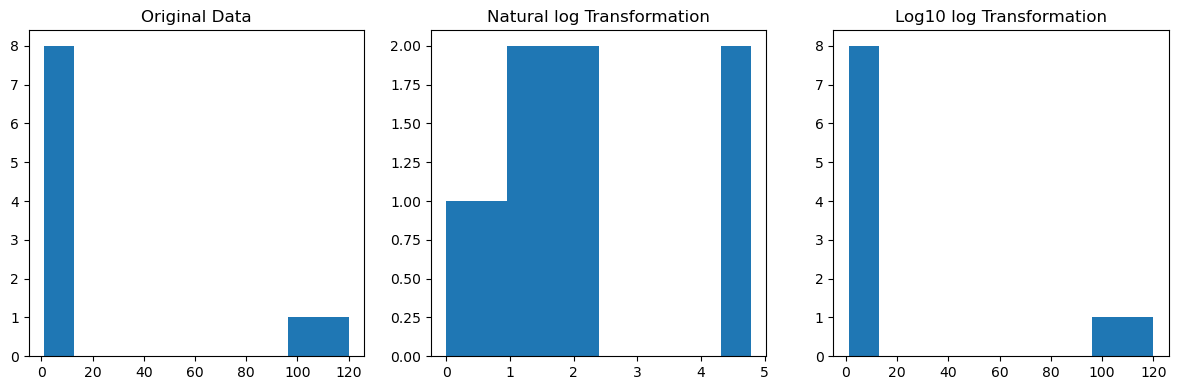

Original values:  [  1   2   3   4   5   6   7   8 100 120]
Log transformed values:  [0.         0.69314718 1.09861229 1.38629436 1.60943791 1.79175947
 1.94591015 2.07944154 4.60517019 4.78749174]
Log 10 transformed values:  [0.         0.30103    0.47712125 0.60205999 0.69897    0.77815125
 0.84509804 0.90308999 2.         2.07918125]


In [38]:
import matplotlib.pyplot as plt

data = np.array([1,2,3,4,5,6,7,8, 100, 120])

log_data = np.log(data)
log10_data = np.log10(data)

plt.figure(figsize = (12, 4))

plt.subplot(131)
plt.hist(data)
plt.title("Original Data")

plt.subplot(132)
plt.hist(log_data)
plt.title("Natural log Transformation")

plt.subplot(133)
plt.hist(data)
plt.title("Log10 log Transformation")

plt.tight_layout()
plt.show()

print("Original values: ", data)
print("Log transformed values: ", log_data)
print("Log 10 transformed values: ", log10_data)



* Square Root Transformation

[ 1.          1.41421356  1.73205081  2.          2.23606798  2.44948974
  2.64575131  2.82842712 10.         10.95445115]


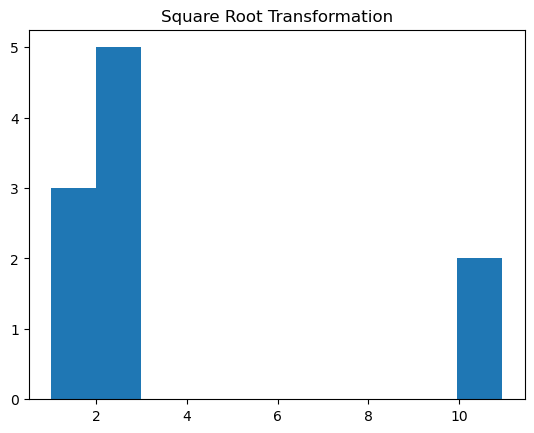

In [39]:
sqrt_data = np.sqrt(data)

plt.hist(sqrt_data)
plt.title("Square Root Transformation")

print(sqrt_data)

## Capping and Flooring

This technique reduces the outliers by limiting the range of data to a upper bound(cap) and a lower bound(floor).

In [40]:
# Step 1: Calculate IQR

Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}, Upper Bound: {upper_bound}")


Lower bound: 27.544716185257876, Upper Bound: 71.91979010243983


In [45]:
df['Capped_Value'] = np.where(df["Value"] > upper_bound, upper_bound,
                              np.where(df["Value"] < lower_bound, lower_bound, df["Value"]))

print(df[["Value", "Capped_Value"]].tail(10))

          Value  Capped_Value
93    46.723379     46.723379
94    46.078918     46.078918
95    35.364851     35.364851
96    52.961203     52.961203
97    52.610553     52.610553
98    50.051135     50.051135
99    47.654129     47.654129
100  150.000000     71.919790
101  160.000000     71.919790
102  170.000000     71.919790


## Feature Scaling

### 1. Noramalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

data = np.array([[50], [20], [15], [40], [80]])

scaler = MinMaxScaler(feature_range=(0,1))
normalized_data = scaler.fit_transform(data)

print(normalized_data)

[[0.53846154]
 [0.07692308]
 [0.        ]
 [0.38461538]
 [1.        ]]


### 2. Standardization

In [47]:
data = np.array([[50], [40], [15], [20], [80]])

scaler = StandardScaler()
SS_data = scaler.fit_transform(data)

print(SS_data)

[[ 0.38587182]
 [-0.04287465]
 [-1.1147408 ]
 [-0.90036757]
 [ 1.67211121]]


### 3. Robust Scaling (Interquartile Range Scaling)



In [48]:
from sklearn.preprocessing import RobustScaler

data = np.array([[50], [20], [15], [40], [80]])

scaler = RobustScaler()
robust_scaled_data = scaler.fit_transform(data)

print(robust_scaled_data)

[[ 0.33333333]
 [-0.66666667]
 [-0.83333333]
 [ 0.        ]
 [ 1.33333333]]


## Feature Engineering

In [50]:
data = {
    'age': [25, 32, 40, 22, 35],
    'salary': [40000, 50000, 60000, 32000, 55000],
    'experience': [3, 8, 10, 1, 7]
}

df = pd.DataFrame(data)

df['Salary_per_year'] = df['salary'] / df['experience']
df['salary_per_year'] = df['salary'] / df['age']

print(df)

   age  salary  experience  Salary_per_year  salary_per_year
0   25   40000           3     13333.333333      1600.000000
1   32   50000           8      6250.000000      1562.500000
2   40   60000          10      6000.000000      1500.000000
3   22   32000           1     32000.000000      1454.545455
4   35   55000           7      7857.142857      1571.428571


## Transformations

### 1. Log Transformations

In [51]:
df['log_salary'] = np.log(df['salary'])
print(df)

   age  salary  experience  Salary_per_year  salary_per_year  log_salary
0   25   40000           3     13333.333333      1600.000000   10.596635
1   32   50000           8      6250.000000      1562.500000   10.819778
2   40   60000          10      6000.000000      1500.000000   11.002100
3   22   32000           1     32000.000000      1454.545455   10.373491
4   35   55000           7      7857.142857      1571.428571   10.915088


### 2. Polynomial Transformation

In [52]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(df[['experience', 'age']])
print(poly_features)

[[1.000e+00 3.000e+00 2.500e+01 9.000e+00 7.500e+01 6.250e+02]
 [1.000e+00 8.000e+00 3.200e+01 6.400e+01 2.560e+02 1.024e+03]
 [1.000e+00 1.000e+01 4.000e+01 1.000e+02 4.000e+02 1.600e+03]
 [1.000e+00 1.000e+00 2.200e+01 1.000e+00 2.200e+01 4.840e+02]
 [1.000e+00 7.000e+00 3.500e+01 4.900e+01 2.450e+02 1.225e+03]]


### 3. Encoding Categorical Variables

#### One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

data =  {
    'Employee id': [10, 20, 15, 25, 30],
    'Gender': ['M', 'F', 'F', 'M', 'F'],
    'Remarks': ['Good', 'Nice', 'Good', 'Great', 'Nice']
}

df = pd.DataFrame(data)
print(f'Original Employee Data: \n{df}\n')

# Use pd.get_dummies() to one hot encode categorical columns
df_pandas_encoded = pd.get_dummies(df, columns=['Gender', 'Remarks'], drop_first=True)

print(f'One-Hot Encoded Data using Pandas:\n{df_pandas_encoded}\n')

encoder = OneHotEncoder(sparse_output= False)

one_hot_encoded = encoder.fit_transform(df[categorical_columns])

In [56]:
import pandas as pd

data = {
    'Color': ['Red', 'Green', 'Blue', 'Green', 'Red']
}
df = pd.DataFrame(data)

one_hot = pd.get_dummies(df['Color'])
df = pd.concat([df, one_hot], axis=1)
print(df)

   Color   Blue  Green    Red
0    Red  False  False   True
1  Green  False   True  False
2   Blue   True  False  False
3  Green  False   True  False
4    Red  False  False   True


In [57]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Color_Label'] = encoder.fit_transform(df['Color'])
print(df)

   Color   Blue  Green    Red  Color_Label
0    Red  False  False   True            2
1  Green  False   True  False            1
2   Blue   True  False  False            0
3  Green  False   True  False            1
4    Red  False  False   True            2


## Feature Selection

### Filter Methods

#### 1. Pearson Correlation

In [58]:
df = pd.DataFrame(data={
    'edu_goal': ['bachelors', 'bachelors', 'bachelors', 'masters', 'masters', 'masters', 'masters', 'phd', 'phd', 'phd'],
    'hours_study': [1, 2, 3, 3, 3, 4, 3, 4, 5, 5],
    'hours_TV': [4, 3, 4, 3, 2, 3, 2, 2, 1, 1],
    'hours_sleep': [10, 10, 8, 8, 6, 6, 8, 8, 10, 10],
    'height_cm': [155, 151, 160, 160, 156, 150, 164, 151, 158, 152],
    'grade_level': [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
    'exam_score': [71, 72, 78, 79, 85, 86, 92, 93, 99, 100]
})

print(df)

    edu_goal  hours_study  hours_TV  hours_sleep  height_cm  grade_level  \
0  bachelors            1         4           10        155            8   
1  bachelors            2         3           10        151            8   
2  bachelors            3         4            8        160            8   
3    masters            3         3            8        160            8   
4    masters            3         2            6        156            8   
5    masters            4         3            6        150            8   
6    masters            3         2            8        164            8   
7        phd            4         2            8        151            8   
8        phd            5         1           10        158            8   
9        phd            5         1           10        152            8   

   exam_score  
0          71  
1          72  
2          78  
3          79  
4          85  
5          86  
6          92  
7          93  
8          99  
9  

In [60]:
X = df.drop(columns=['exam_score'])
print(X)


    edu_goal  hours_study  hours_TV  hours_sleep  height_cm  grade_level
0  bachelors            1         4           10        155            8
1  bachelors            2         3           10        151            8
2  bachelors            3         4            8        160            8
3    masters            3         3            8        160            8
4    masters            3         2            6        156            8
5    masters            4         3            6        150            8
6    masters            3         2            8        164            8
7        phd            4         2            8        151            8
8        phd            5         1           10        158            8
9        phd            5         1           10        152            8


In [62]:
Y = df['exam_score']
print(Y)

0     71
1     72
2     78
3     79
4     85
5     86
6     92
7     93
8     99
9    100
Name: exam_score, dtype: int64


In [ ]:
import seaborn as sns

X_num = df.drop(columns=['edu_goal'])
corr_matrix = X_num.corr(method="pearson")

<Axes: >

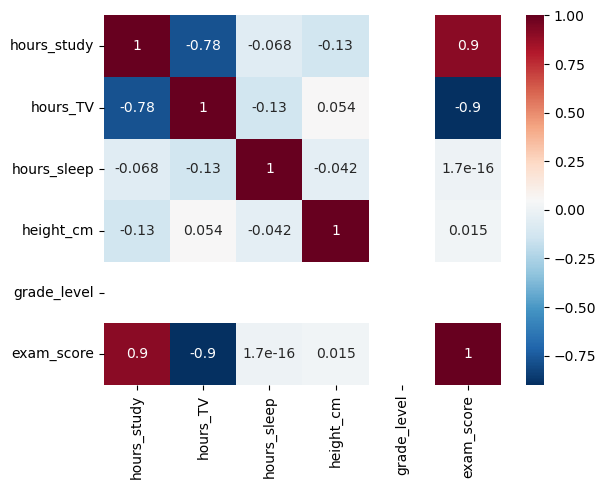

In [68]:
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')

#### 2. Variance Threshold

In [77]:
from sklearn.feature_selection import VarianceThreshold

X_num = X.drop(columns=['edu_goal'])

selector = VarianceThreshold(threshold=1)

print(selector.fit_transform(X_num))


[[  1   4  10 155]
 [  2   3  10 151]
 [  3   4   8 160]
 [  3   3   8 160]
 [  3   2   6 156]
 [  4   3   6 150]
 [  3   2   8 164]
 [  4   2   8 151]
 [  5   1  10 158]
 [  5   1  10 152]]


## Wrapper Methods

### RFE (Recursive Feature Elimination)


In [80]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

data = load_iris()
X, y = data.data, data.target

data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:


model = RandomForestClassifier()
rfe = RFE(estimator=model, n_features_to_select=2)
X_rfe = rfe.fit_transform(X,y)

print("Selected features: ", rfe.support_)
print("Feature ranking: ", rfe.ranking_)

Selected features:  [False False  True  True]
Feature ranking:  [2 3 1 1]


### 2. Step-wise Selection

In [83]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

model = LinearRegression()

# Using 'r2' (R-squared) as the scoring metric for regression
sfs = SFS(model, k_features=3, forward=True, scoring='r2')
sfs.fit(X, y)

print("Selected features: ", sfs.k_feature_names_)

Selected features:  ('0', '2', '3')


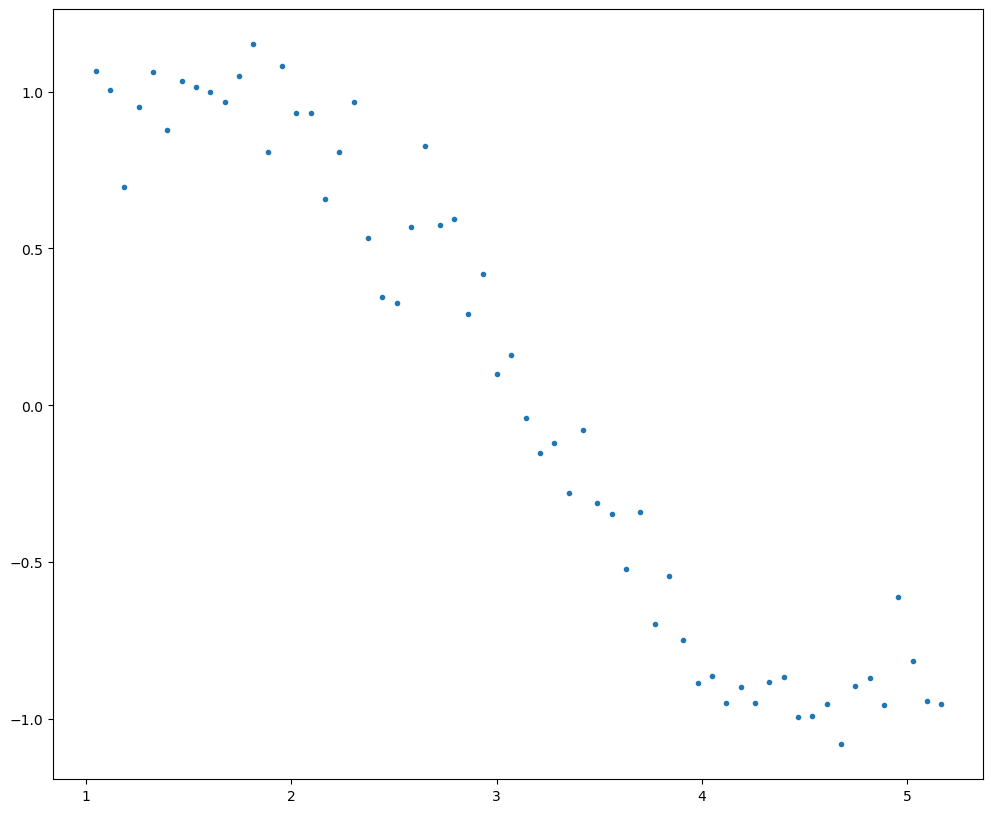

In [84]:
#Importing libraries. The same will be used throughout the article.
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducibility
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')
plt.show()

In [85]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
print(data.head()) #add a column for each power upto 15 

          x         y       x_2       x_3       x_4       x_5       x_6  \
0  1.047198  1.065763  1.096623  1.148381  1.202581  1.259340  1.318778   
1  1.117011  1.006086  1.247713  1.393709  1.556788  1.738948  1.942424   
2  1.186824  0.695374  1.408551  1.671702  1.984016  2.354677  2.794587   
3  1.256637  0.949799  1.579137  1.984402  2.493673  3.133642  3.937850   
4  1.326450  1.063496  1.759470  2.333850  3.095735  4.106339  5.446854   

        x_7       x_8        x_9       x_10       x_11       x_12       x_13  \
0  1.381021  1.446202   1.514459   1.585938   1.660790   1.739176   1.821260   
1  2.169709  2.423588   2.707173   3.023942   3.377775   3.773011   4.214494   
2  3.316683  3.936319   4.671717   5.544505   6.580351   7.809718   9.268760   
3  4.948448  6.218404   7.814277   9.819710  12.339811  15.506664  19.486248   
4  7.224981  9.583578  12.712139  16.862020  22.366630  29.668222  39.353420   

        x_14       x_15  
0   1.907219   1.997235  
1   4.707635   5

In [88]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression()
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

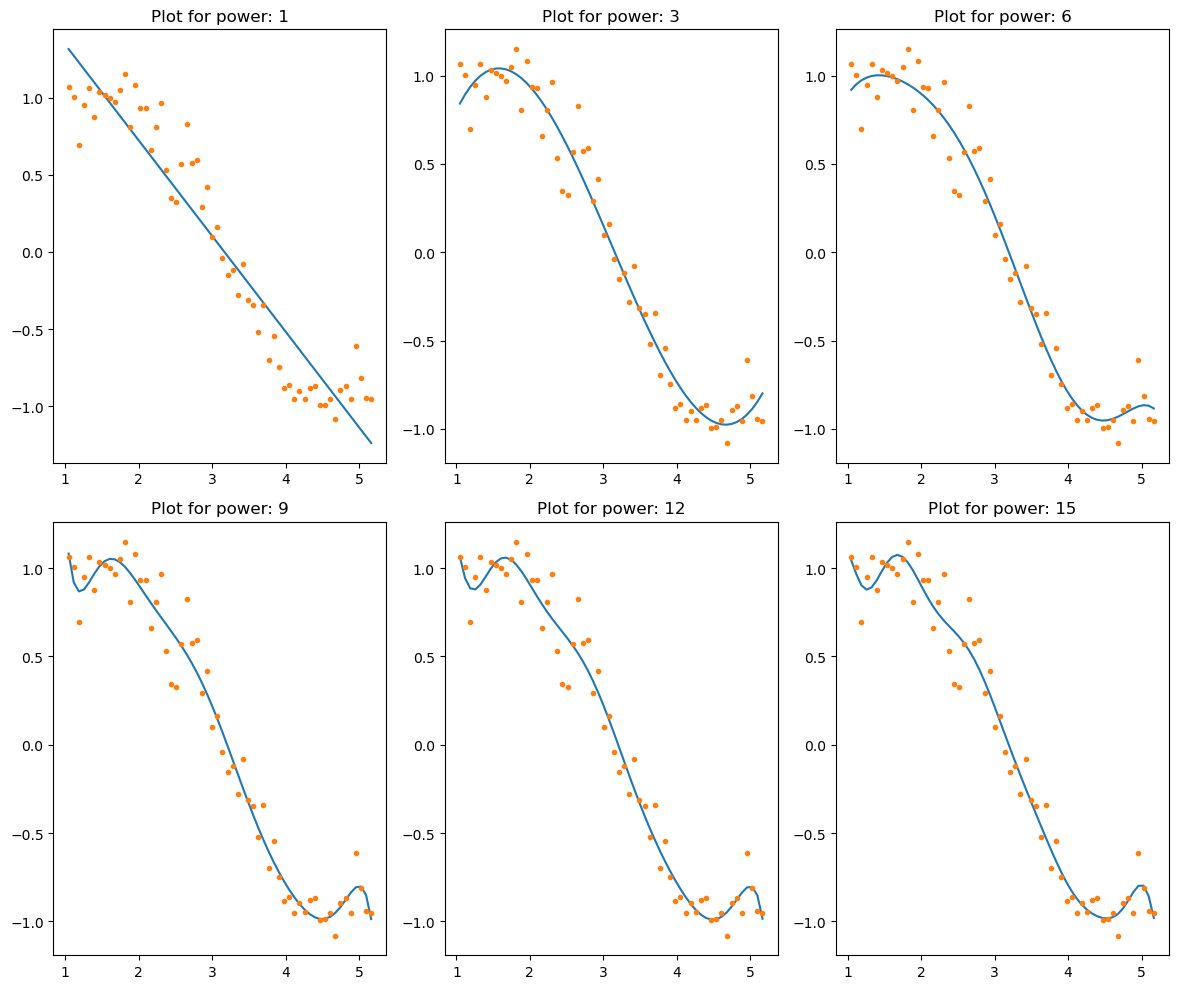

In [89]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)
model.fit(X, y)

print()

ValueError: Found input variables with inconsistent numbers of samples: [150, 60]